<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Focusing on casualty statistics over different time periods

In [ ]:
# Import All Required Python Modules

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Data Formatting Functions

def empty_to_zero(val):
    '''Converts empty values to 0'''
    val = val.strip('\s+')
    return val if len(val) else 0


def convert_to_numeric(df, column_list):
    '''Given a list of DataFrame columns, it converts the empty values to zero'''
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Set Up Some Global Variables

# I'm omitting longitude, latitude, the vehicle types as well as crash contributing factors.
cols_requested = ['COLLISION_ID', 'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
                  'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

# To ensure that the colums are of the expected data type
crash_dtypes = {'CRASH DATE': str,
                'CRASH TIME': str,
                'BOROUGH': str,
                'ZIP CODE': str,
                'LOCATION': str,
                'ON STREET NAME': str,
                'CROSS STREET NAME': str,
                'OFF STREET NAME': str,
                }

# Rename some colums to ones that I believe are shorter and/or more meaningful
cols_rename = {'CRASH DATE': 'DATE',
               'CRASH TIME': 'TIME',
               'ZIP CODE': 'ZIP_CODE',
               'ON STREET NAME': 'ON_STREET_NAME',
               'CROSS STREET NAME': 'CROSS_STREET_NAME',
               'OFF STREET NAME': 'OFF_STREET_NAME',
               'NUMBER OF PERSONS INJURED': 'NUM_PERSONS_INJURED',
               'NUMBER OF PERSONS KILLED': 'NUM_PERSONS_KILLED',
               'NUMBER OF PEDESTRIANS INJURED': 'NUM_PEDESTRIANS_INJURED',
               'NUMBER OF PEDESTRIANS KILLED': 'NUM_PEDESTRIANS_KILLED',
               'NUMBER OF CYCLIST INJURED': 'NUM_CYCLISTS_INJURED',
               'NUMBER OF CYCLIST KILLED': 'NUM_CYCLISTS_KILLED',
               'NUMBER OF MOTORIST INJURED': 'NUM_MOTORISTS_INJURED',
               'NUMBER OF MOTORIST KILLED': 'NUM_MOTORISTS_KILLED'
               }

# Columns that contain numeric values
numeric_cols = ['NUM_PERSONS_INJURED',
                'NUM_PERSONS_KILLED',
                'NUM_PEDESTRIANS_INJURED',
                'NUM_PEDESTRIANS_KILLED',
                'NUM_CYCLISTS_INJURED',
                'NUM_CYCLISTS_KILLED',
                'NUM_MOTORISTS_INJURED',
                'NUM_MOTORISTS_KILLED']

# These ordered lists are useful for plotting charts
day_names_order = ["Monday", "Tuesday", "Wednesday",
                   "Thursday", "Friday", "Saturday", "Sunday"]
day_abbr_order = [d[0:3] for d in day_names_order]
month_names_order = ["January", "February", "March", "April", "May",
                     "June", "July", "August", "September", "October", "November", "December"]
month_abbr_order = [m[0:3] for m in month_names_order]

# The following DataFrame columns that will have their empty values converted to zero using the
# 'empty_to_zero' function
convert_cols = {
    'NUMBER OF PERSONS INJURED': empty_to_zero,
    'NUMBER OF PERSONS KILLED':  empty_to_zero,
    'NUMBER OF PEDESTRIANS INJURED': empty_to_zero,
    'NUMBER OF PEDESTRIANS KILLED': empty_to_zero,
    'NUMBER OF CYCLIST INJURED': empty_to_zero,
    'NUMBER OF CYCLIST KILLED': empty_to_zero,
    'NUMBER OF MOTORIST INJURED': empty_to_zero,
    'NUMBER OF MOTORIST KILLED': empty_to_zero
}

# These are the 4 categories supplied by the NYPD
# 'person' status should be a combination of the other three categories
# TODO I need to verify the relationship between 'person' and the other three categories
victim_categories = ['person', 'cyclist', 'motorist', 'pedestrian']

# These are the Matplotlib Tableau colors
bar_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red',
              'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

base_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

# Chart Colors
color = 'k'
plt.rcParams['text.color'] = color
plt.rcParams['axes.labelcolor'] = color
plt.rcParams['xtick.color'] = 'b'
plt.rcParams['ytick.color'] = 'b'

### Read the NYC collision data CSV file. 

#### The Collision Dataset provided by NYPD [is available here](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95).

In [ ]:
# |eval: true
# Using the Pandas 'read_csv' function
crash = pd.read_csv('../Motor_Vehicle_Collisions_Aug15_2023.csv',
                    index_col='COLLISION_ID', usecols=cols_requested, dtype=crash_dtypes, converters=convert_cols)

## Print out the column names before and after they are renamed

In [ ]:
original_col_names = crash.columns.to_list()
print("Original Crash Column Names")
print(original_col_names)

# Rename the columns using the list of new names, 'cols_rename'
crash.rename(columns=cols_rename, inplace=True)

print("Renamed Crash Columns Names")
print(crash.columns.to_list())

Original Crash Column Names
['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']
Renamed Crash Columns Names
['DATE', 'TIME', 'BOROUGH', 'ZIP_CODE', 'LOCATION', 'ON_STREET_NAME', 'CROSS_STREET_NAME', 'OFF_STREET_NAME', 'NUM_PERSONS_INJURED', 'NUM_PERSONS_KILLED', 'NUM_PEDESTRIANS_INJURED', 'NUM_PEDESTRIANS_KILLED', 'NUM_CYCLISTS_INJURED', 'NUM_CYCLISTS_KILLED', 'NUM_MOTORISTS_INJURED', 'NUM_MOTORISTS_KILLED']


In [ ]:
# Ensure that the 'numeric_cols' column values are numeric and not string values

convert_to_numeric(crash, numeric_cols)

In [ ]:
#  General Description of the dataset.

# The 'set_option' is uesed here to display numeric values as a 'float' rather
# than the default scientific notation
pd.set_option('display.float_format', lambda x: '%8.2f' % x)
crash.describe()

,NUM_PERSONS_INJURED,NUM_PERSONS_KILLED,NUM_PEDESTRIANS_INJURED,NUM_PEDESTRIANS_KILLED,NUM_CYCLISTS_INJURED,NUM_CYCLISTS_KILLED,NUM_MOTORISTS_INJURED,NUM_MOTORISTS_KILLED
count,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00,2017370.00
mean,0.30,0.00,0.06,0.00,0.03,0.00,0.22,0.00
std,0.69,0.04,0.24,0.03,0.16,0.01,0.65,0.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,43.00,8.00,27.00,6.00,4.00,2.00,43.00,5.00


### Merge the 'DATE' and 'TIME' columns into one 'DATE' column.

The original 'DATE' is a "date only" field without the time.
After merging the date and time columns, convert 'DATE' to a Python "datetime" object. Then remove the now unnecessary 'TIME' column.

In [ ]:
# Merge
crash['DATE'] = pd.to_datetime(crash['DATE'] + " " + crash['TIME'])
# Remove the 'TIME' column
crash.drop(columns=['TIME'], inplace=True)
# Convert to Python 'datetime'
crash['DATE'] = pd.to_datetime(crash['DATE'])

In [ ]:
crash['DATE'].describe()

count                          2017370
mean     2017-05-13 17:54:54.650598912
min                2012-07-01 00:05:00
25%                2014-12-19 13:00:15
50%                2017-03-29 10:07:30
75%                2019-06-09 17:50:00
max                2023-08-12 23:56:00
Name: DATE, dtype: object

#### From the ```crash['DATE'].describe()```
We can see that the first collision record (**min**) was on July 7, 2012
The last record (**max**), for this iteration is August 12, 2023.

In [ ]:
# Create a "start_date" and "end_date" variable, which is useful for our charts

start_date = crash['DATE'].dt.date.min()
end_date = crash['DATE'].dt.date.max()

print("Start Date: {0} - End Date: {1}".format(start_date, end_date))

Start Date: 2012-07-01 - End Date: 2023-08-12


#### The 'UNKNOWN' Borough
  
The **BOROUGH**  column contains the 5 boroughs of New York City, BROOKLYN, BRONX, MANHATTAN, QUEENS and STATEN ISLAND.  
Unfortunately, many of the 'BOROUGH' fields are empty.  
The NYPD don't record the borough in certain situations. For example, if the collision occurred on one of the main bridges between boroughs, or if the collision occurred on any one of NYC's many expressways or parkways. 
Further investigation would be needed to confirm this.   
*I previously reached out to the open data team for more information on this, but got no reply*.

In [ ]:
# Replace empty 'BOROUGH' values with 'UNKNOWN'

crash.fillna(value={'BOROUGH': 'UNKNOWN'}, inplace=True)
crash['BOROUGH'].describe()

count     2017370
unique          6
top       UNKNOWN
freq       627585
Name: BOROUGH, dtype: object

#### ```crash['BOROUGH'].describe()``` provides some useful information.

- **unique**
  - Unique borough name count, which includes the 'UNKNOWN' borough
- **top**
  - 'UNKNOWN' is the most frequent borough recorded
- **freq**
  - Tells us the occurrence of 'UNKNOWN' borough records
- **count**
  - How many rows of data in the dataset

In [ ]:
# Another check to see the unique borough names

crash['BOROUGH'].unique()

array(['UNKNOWN', 'BROOKLYN', 'BRONX', 'MANHATTAN', 'QUEENS',
       'STATEN ISLAND'], dtype=object)

#### ZIP_CODE

As with the BOROUGH column, the postal **ZIP_CODE** is often left empty.
In this case, using ```crash['ZIP_CODE'].describe()```, we see that the ZIP_CODE with the most collisions, **top**, is 11207 in Brooklyn. The **freq** gives a count of collisions for this zip code.
It has a pretty large population, almost 80,000 people, which may account for the large numbers. A future project would be to see how these zip code counts relate to their population.
The **unique** number tells us that there are 234 NYC zip codes with recorded collisions. 

[Check out zip code, 11207 here](https://www.unitedstateszipcodes.org/11207/).

In [ ]:
crash['ZIP_CODE'].describe()

count     1389547
unique        234
top         11207
freq        26853
Name: ZIP_CODE, dtype: object

In [ ]:
# Replace empty ZIP_CODE's with 'UNKNOWN'

crash.fillna(value={'ZIP_CODE': 'UNKNOWN'}, inplace=True)
crash['ZIP_CODE'].head()

COLLISION_ID
4455765    UNKNOWN
4513547    UNKNOWN
4541903    UNKNOWN
4456314      11208
4486609      11233
Name: ZIP_CODE, dtype: object

In [ ]:
# |code-fold: true
# Set up some date columns: YEAR, MONTH_NAME, DAY_NAME, HOUR
# and remove any records for 2012

crash['YEAR'] = crash['DATE'].dt.year

# Get rid of 2012 as it only has 6 months of data
no_2012_mask = crash['YEAR'] > 2012
crash = crash[no_2012_mask]

# Reset the start_date variable to reflect the change
start_date = crash['DATE'].dt.date.min()
year_order = crash['YEAR'].sort_values().unique()
print("Year order: {}".format(year_order))

# Create a MONTH_NAME column. Actually, month abbreviated name
crash['MONTH_NAME'] = crash['DATE'].dt.month_name().str[0:3]
print("Month abbreviations: {}".format(crash.MONTH_NAME.unique()))

# Create a HOUR column, which reflects the hour of day that the collision occurred
crash['HOUR'] = crash['DATE'].dt.strftime("%H")

# Need to convert hour_order to a Python list instead of Numpy array
hour_order = crash['HOUR'].sort_values().unique().tolist()

print("Hour order: {}".format(hour_order))

crash['DAY_NAME'] = crash['DATE'].dt.strftime("%a")

Year order: [2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
Month abbreviations: ['Sep' 'Mar' 'Jun' 'Dec' 'Apr' 'Jul' 'Feb' 'Aug' 'Nov' 'May' 'Jan' 'Oct']
Hour order: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


#### The Worst Years for Collision Injuries and Deaths

In [ ]:
#|code-fold: true
# Get the Yearly Killed/Injured counts

crash_by_year_killed = crash.groupby(
    'YEAR')['NUM_PERSONS_KILLED'].sum().sort_values(ascending=False)
crash_by_year_injured = crash.groupby(
    'YEAR')['NUM_PERSONS_INJURED'].sum().sort_values(ascending=False)

print("5 Worst Years for Collision Deaths")
print(crash_by_year_killed.head(5))
print("\n5 Worst Years for Collision Injuries")
print(crash_by_year_injured.head(5))

5 Worst Years for Collision Deaths
YEAR
2013    297
2021    296
2022    287
2020    269
2014    262
Name: NUM_PERSONS_KILLED, dtype: int64

5 Worst Years for Collision Injuries
YEAR
2018    61941
2019    61389
2017    60656
2016    60317
2013    55124
Name: NUM_PERSONS_INJURED, dtype: int64


#### Chart the Yearly Collisin Injuries and Deaths

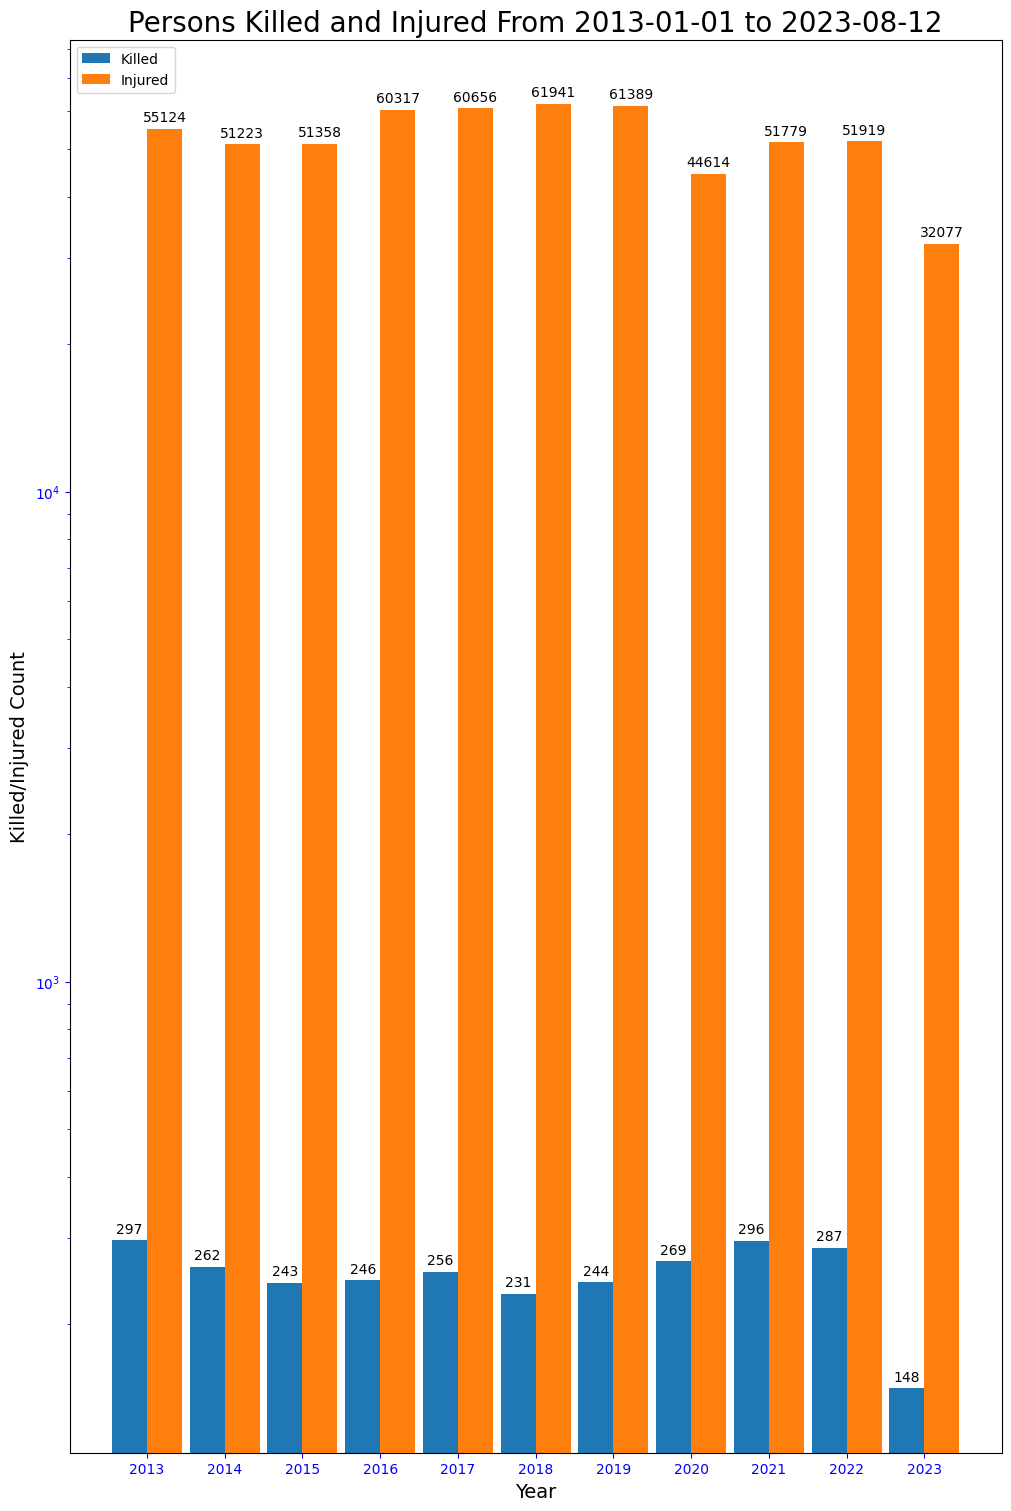

In [ ]:
# | code-fold: true
# Create a plot using Matplotlib with Yearly details on the number of people killed and injured

killed_injured = {
    'Killed': crash_by_year_killed.loc[year_order], 'Injured': crash_by_year_injured.loc[year_order]}

x = np.arange(len(year_order))  # the label locations
width = 0.45  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(figsize=(10, 15), layout='constrained')

# Create the Injured/Killed bars for each year
for killed_or_injured, count in killed_injured.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, count, width, label=killed_or_injured)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Killed/Injured Count', fontsize=14)
ax.set_title('Persons Killed and Injured From {0} to {1}'.format(
    start_date, end_date), fontsize=20)
ax.set_xticks(x + (width/2), year_order)
ax.legend(loc='upper left')
ax.set_yscale('log')
plt.show()

##### Collision Injuries and Deaths since 2013

The chart shows that traffic fatalities had a general downward trend froom the high or 297 in 2013 to a low of 231 in 2018. The trend is upwards from 2019 to 2021, which was just 1 off the worst year, 2013. 
For injuries, 2016 to 2019 were the worst. The following years are a slight improvement, but no visible downward trend yet. 

#### Combine Killed + Injured Counts into one 'CASUALTIES' column

For each category, Person, Pedestrian, Cyclist and Motorist I'm going to combine the Killed/Injured counts into one 'CASUALTY' count. 

In [ ]:
# Combine the INJURED and KILLED columns into one 'CASUALTIES' column.
crash['PERSON_CASUALTY_COUNT'] = crash.NUM_PERSONS_INJURED + \
    crash.NUM_PERSONS_KILLED
crash['PEDESTRIAN_CASUALTY_COUNT'] = crash.NUM_PEDESTRIANS_INJURED + \
    crash.NUM_PEDESTRIANS_KILLED
crash['CYCLIST_CASUALTY_COUNT'] = crash.NUM_CYCLISTS_INJURED + \
    crash.NUM_CYCLISTS_KILLED
crash['MOTORIST_CASUALTY_COUNT'] = crash.NUM_MOTORISTS_INJURED + \
    crash.NUM_MOTORISTS_KILLED
crash.head(60)

kmm = (crash.NUM_PERSONS_KILLED > 0) & (crash.NUM_PERSONS_INJURED > 0)
# Check that it looks good
crash[kmm][['NUM_PERSONS_KILLED', 'NUM_PERSONS_INJURED',
            'PERSON_CASUALTY_COUNT']].head()

,NUM_PERSONS_KILLED,NUM_PERSONS_INJURED,PERSON_CASUALTY_COUNT
COLLISION_ID,,,
4407693,1,4,5
4457151,1,1,2
4457192,1,2,3
4457191,1,3,4
4487497,1,1,2


In [ ]:
'''
Function to print count values above or to the side of chart bars
I got the original function from this useful site, https://www.statology.org
Original Fuction: https://www.statology.org/seaborn-barplot-show-values/
'''


def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:6,.0f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center", fontsize=12)
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:6,.0f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left", fontsize=12)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [ ]:
'''
Helper functions for creating multiple charts based on Grouped statistics
Grouped time periods can be 'HOUR', 'MONTH', 'YEAR', 'DAY_NAME'

Statistics will be created for the below columns. 
    PERSON_CASUALTY_COUNT
    PEDESTRIAN_CASUALTY_COUNT
    CYCLIST_CASUALTY_COUNT
    MOTORIST_CASUALTY_COUNT
'''


def create_grouped_casualty_data_by_category(victim_categories, time_group="YEAR", order_list=None):
    ''' 
    time_group can be 'HOUR', 'DAY_OF_WEEK', 'MONTH', 'YEAR' 
    '''
    time_group = time_group.upper()
    all_casualty_data = []

    for category in victim_categories:
        cat_upper = category.upper()
        casualty_label = cat_upper + '_CASUALTY_COUNT'

        casualty_data = crash.groupby(
            by=[time_group], as_index=True).agg({casualty_label: 'sum'})
        if order_list and len(order_list):
            casualty_data = casualty_data.loc[order_list]

        category_data = {
            'category': category,
            'casualty_label': casualty_label,
            'casualty_data':  casualty_data
        }

        all_casualty_data.append(category_data)
    return all_casualty_data


def create_bar_plots_for_casualty_data(sns, axes, order_list, crash_victims_data):
    for idx, category_data in enumerate(crash_victims_data):
        xlabel = None
        ylabel = None
        # Casualty Chart
        category_title = category_data['category'].title()
        chart_title = "{0} Casualties".format(category_title)

        casualty_max = category_data['casualty_data'][category_data['casualty_label']].max(
        )
        casualty_values = category_data['casualty_data'][category_data['casualty_label']].to_list(
        )

        casualty_colors = ['tab:gray' if (
            x >= casualty_max) else 'tab:red' for x in casualty_values]

        ax = axes[idx]

        sns.barplot(data=category_data['casualty_data'], x=order_list, order=order_list,
                    y=category_data['casualty_label'], palette=casualty_colors, ax=ax).set(title=chart_title, xlabel=xlabel, ylabel=ylabel)

        show_values(axes)

In [ ]:
'''
Set some global chart variables
'''
title_fontsize = 20
label_fontsize = 18
# For spacing between charts on one grid
gridspec_kw = {'wspace': 0.1, 'hspace': 0.1}

sns.set_style("whitegrid")

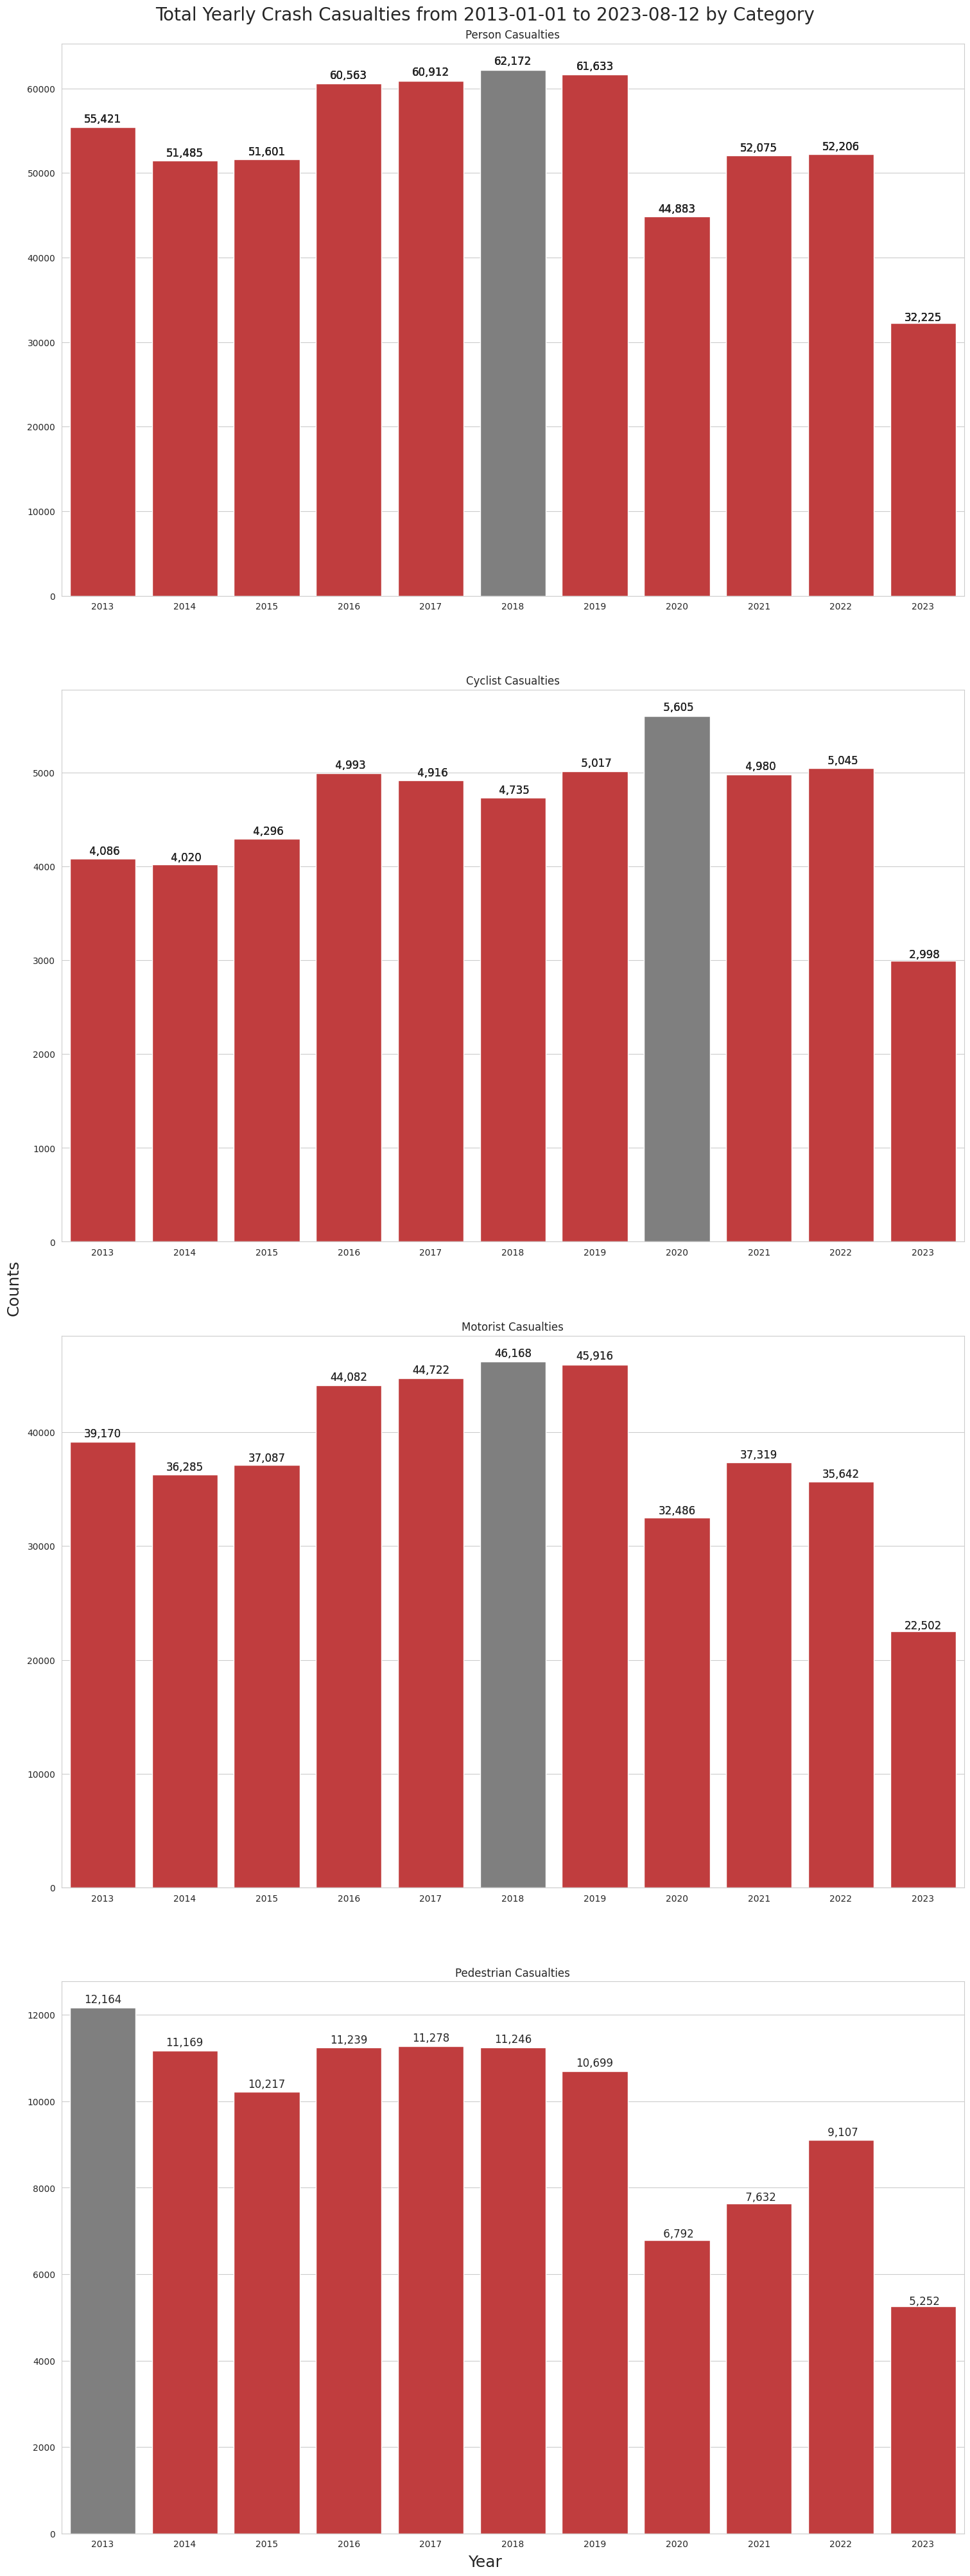

In [ ]:
''' Plot charts for crash casualties based on the Year'''

col_ct = 1
#  Create the outer figure box
fig, axes = plt.subplots(4, col_ct, figsize=(
    15, 40), layout="constrained", gridspec_kw=gridspec_kw)
fig.suptitle("Total Yearly Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Year", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)


crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'year')
create_bar_plots_for_casualty_data(
    sns, axes, year_order, crash_casualty_data)

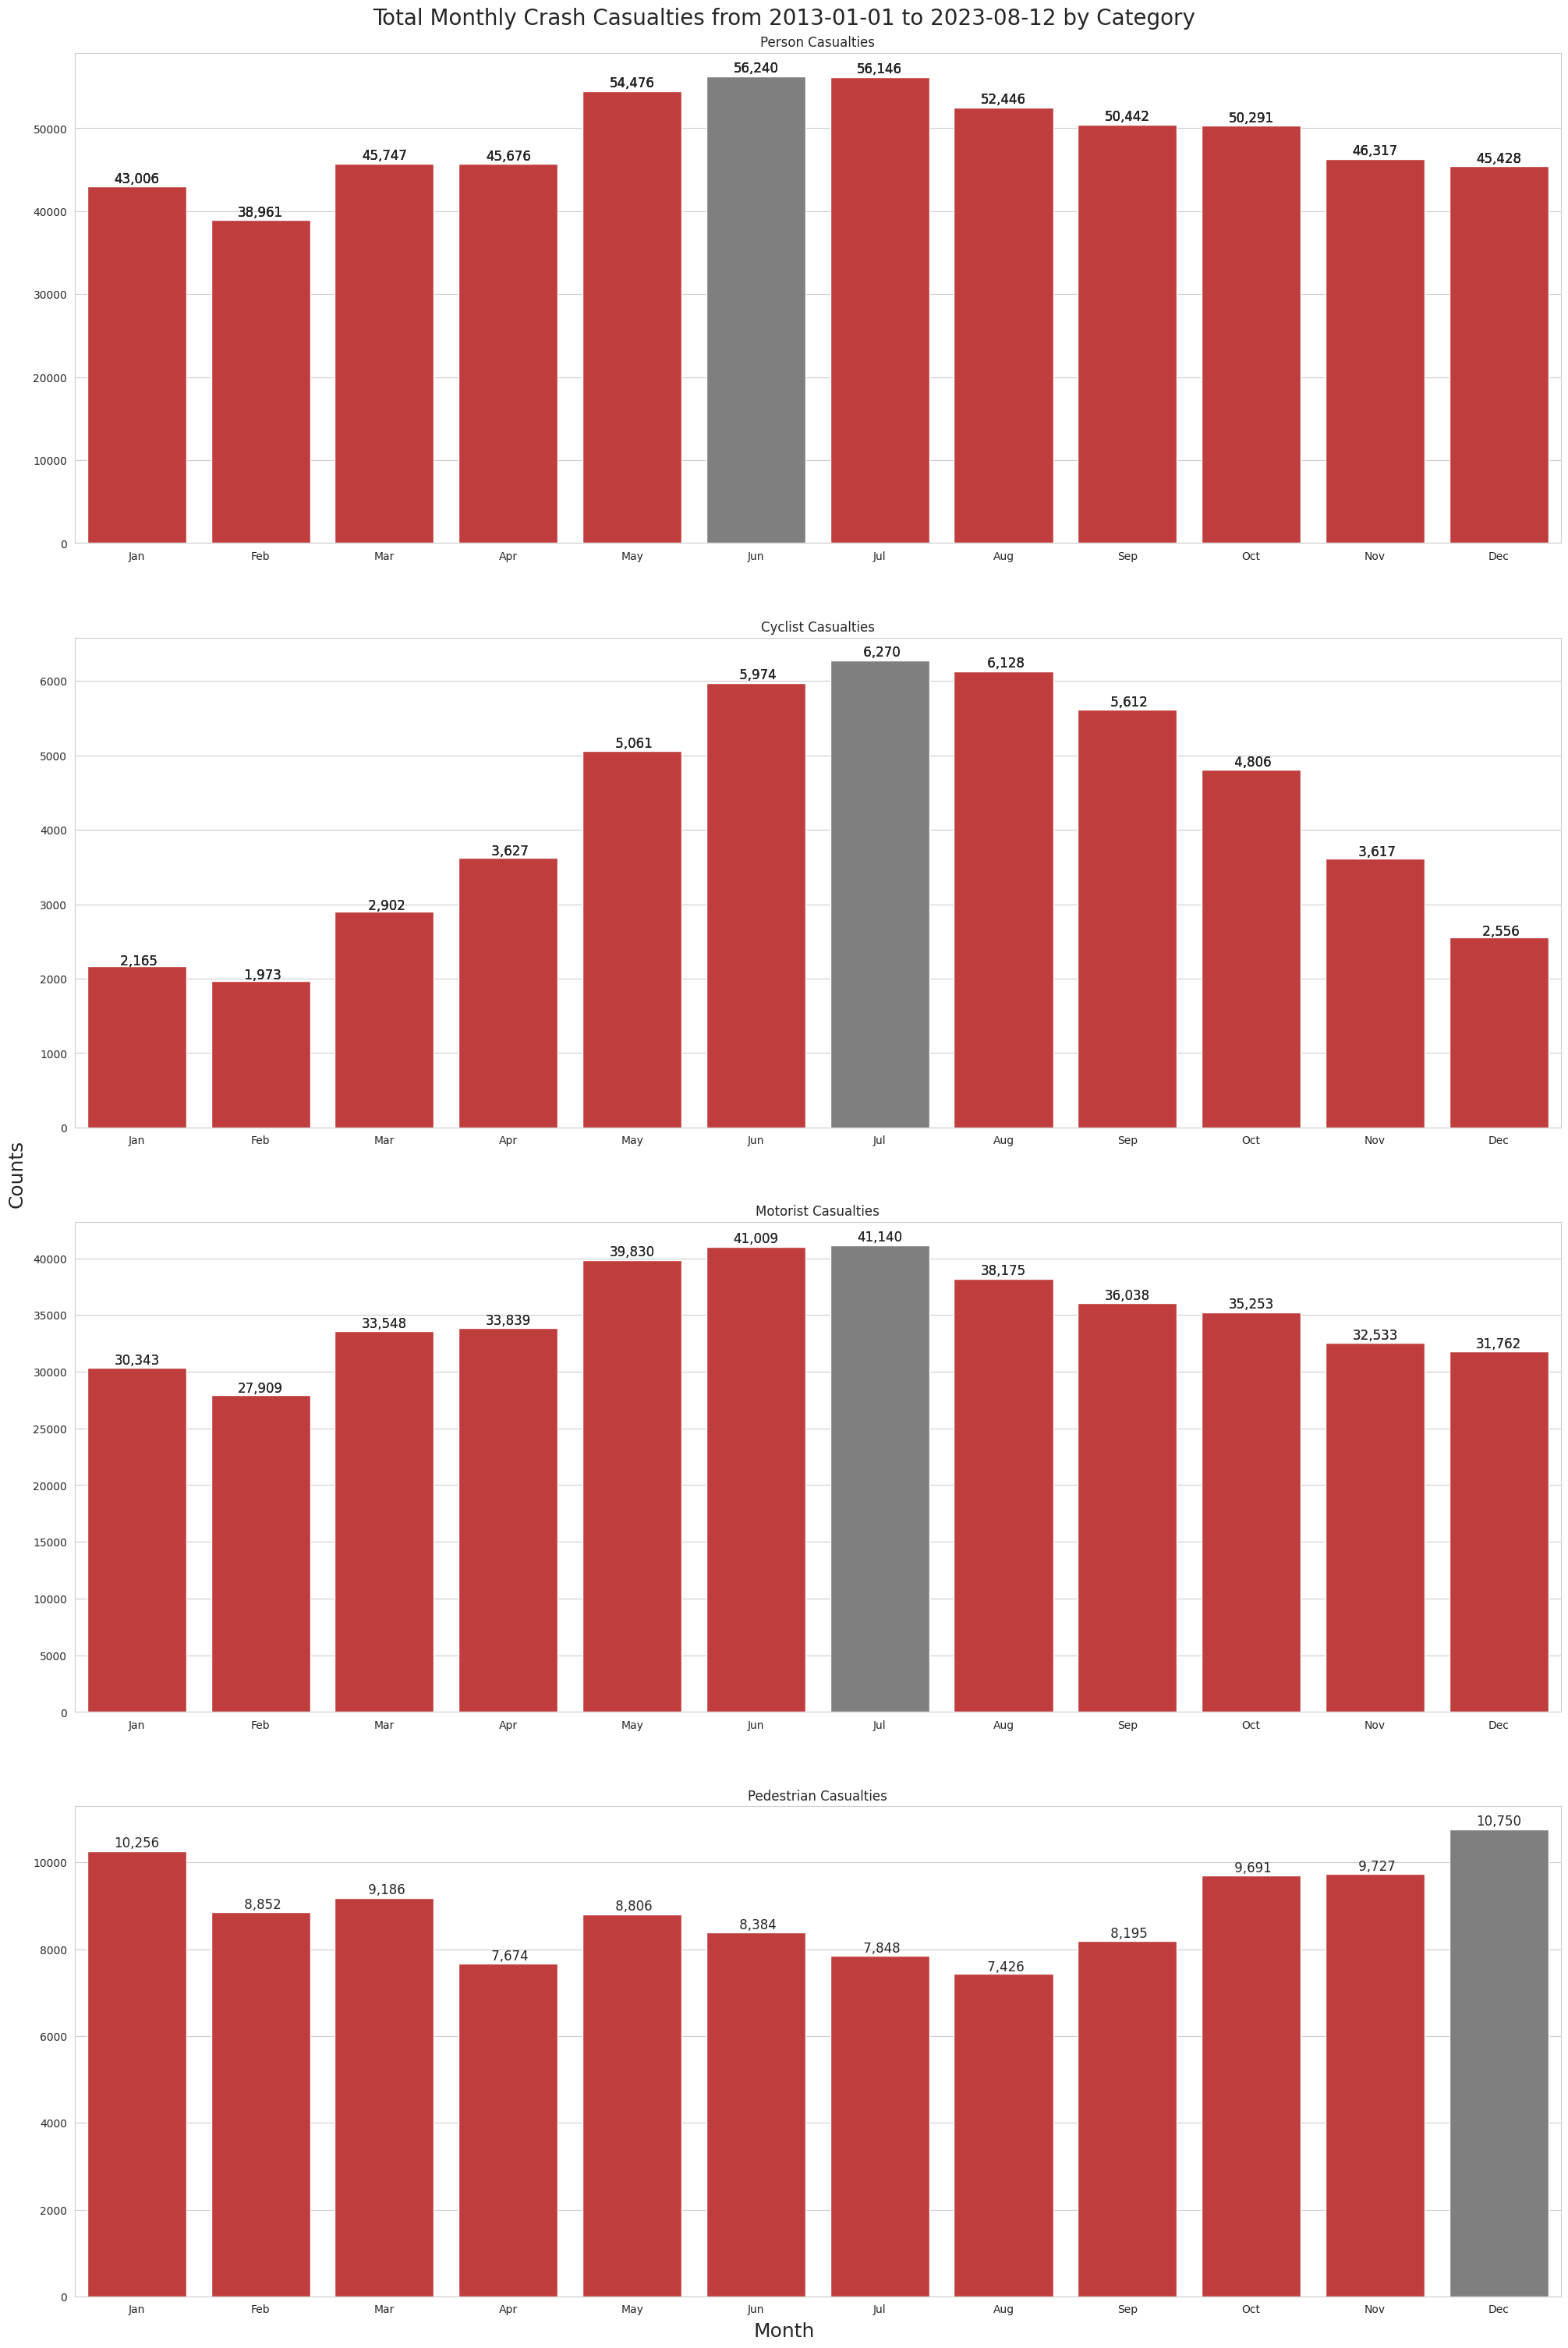

In [ ]:
''' Plot charts for crash casualties based on the Month'''

#  Create the outer figure box
col_ct = 1
fig, axes = plt.subplots(4, col_ct, figsize=(
    20, 30), layout="constrained", gridspec_kw=gridspec_kw)

fig.suptitle("Total Monthly Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Month", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)

crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'month_name', month_abbr_order)
create_bar_plots_for_casualty_data(
    sns, axes, month_abbr_order, crash_casualty_data)

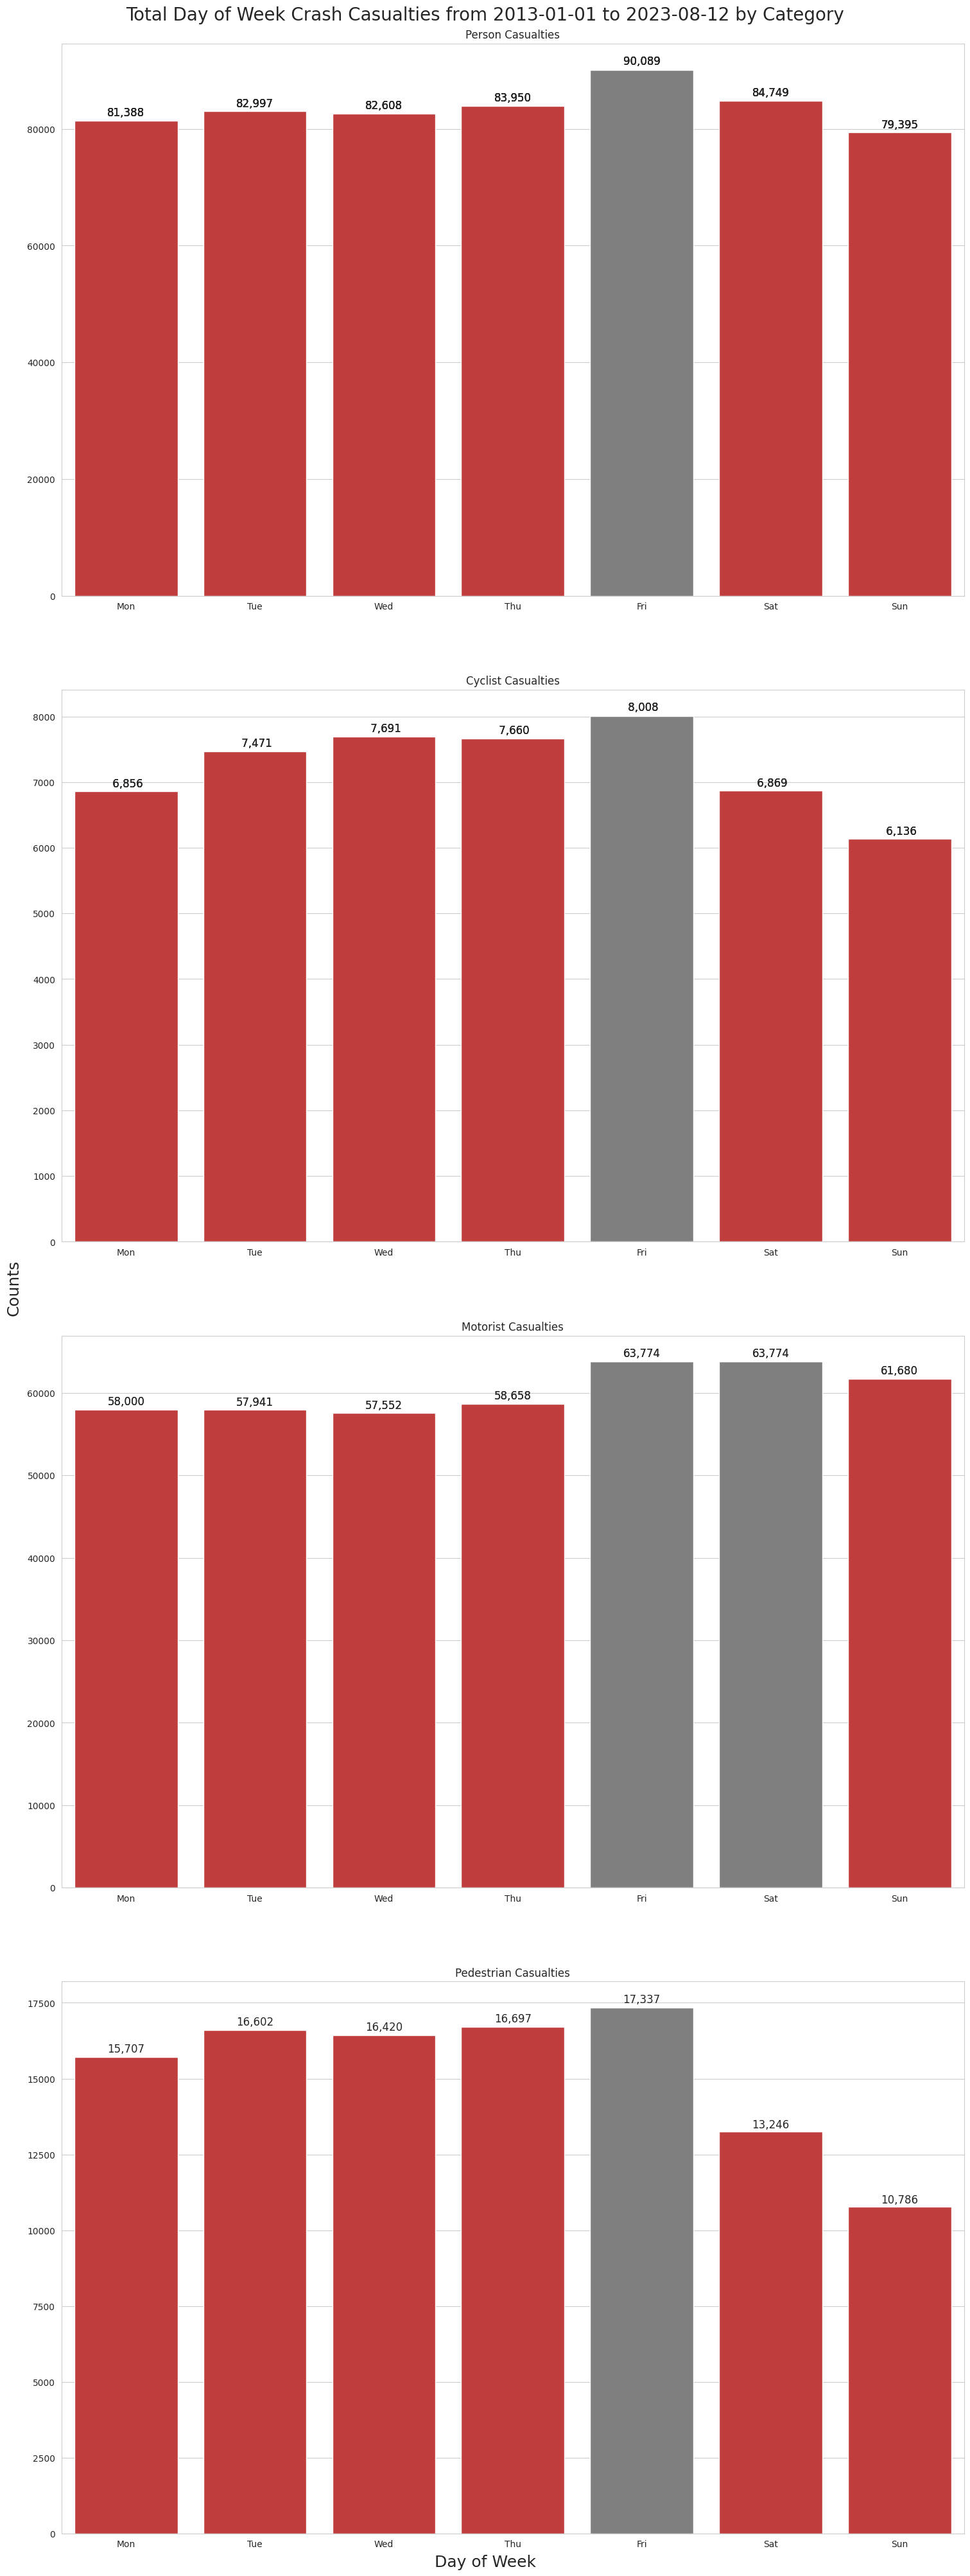

In [ ]:
'''
Plot Charts for Day of Week Statistics
'''
col_ct = 1
fig, axes = plt.subplots(4, col_ct, figsize=(
    15, 40), layout="constrained", gridspec_kw=gridspec_kw)

fig.suptitle("Total Day of Week Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Day of Week", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)

# crash.set_index('MONTH_NAME').loc[month_abbr_order].groupby(by=['MONTH_NAME']).agg({'PEDESTRIAN_CASUALTY_COUNT': 'sum'}).plot(kind='bar')
crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'day_name', day_abbr_order)
crash_casualty_data
create_bar_plots_for_casualty_data(
    sns, axes, day_abbr_order, crash_casualty_data)

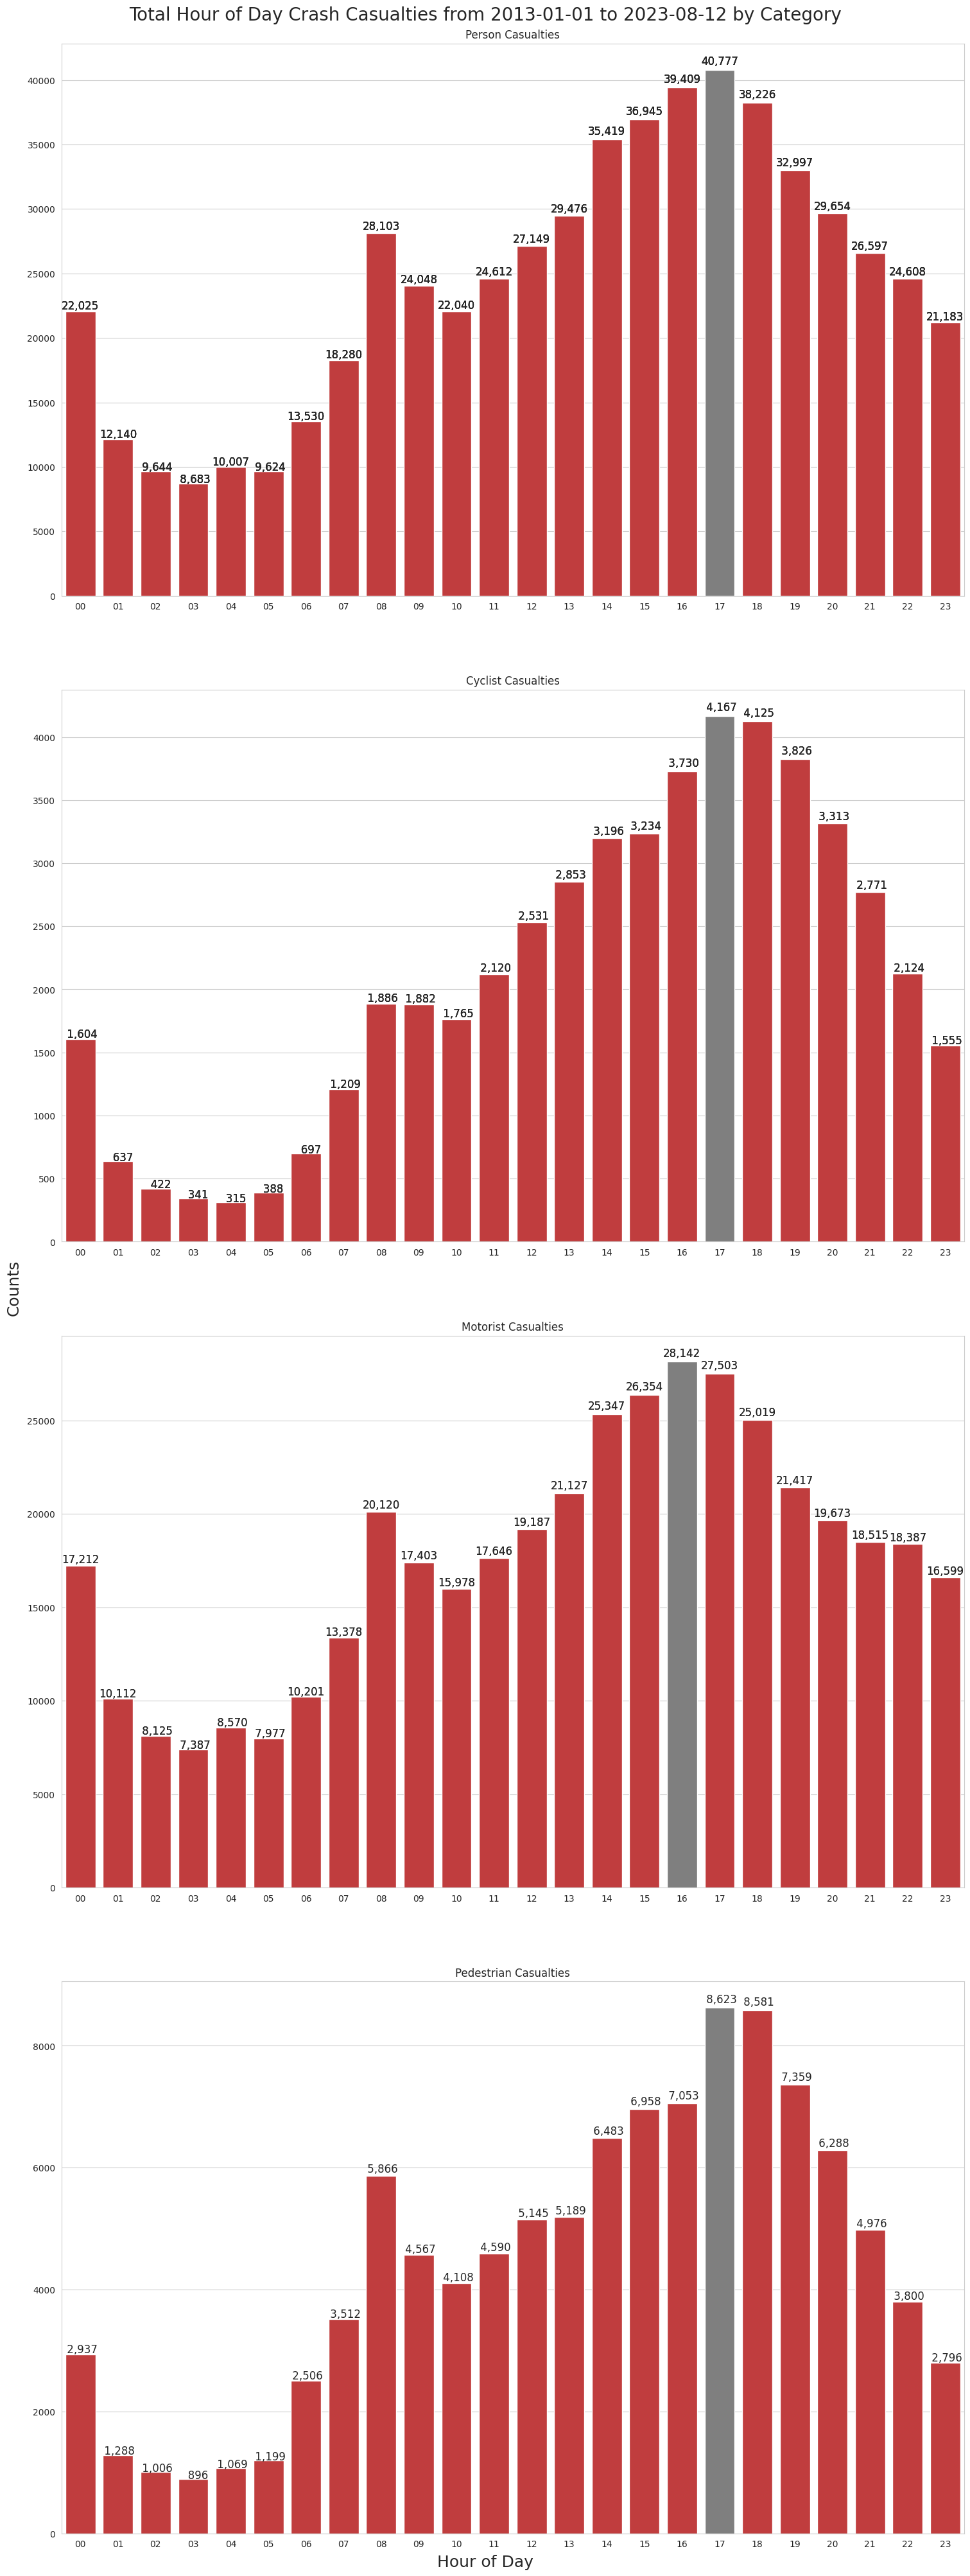

In [ ]:
''' Plot charts for crash casualties based on the Hour of Day'''

#  Create the outer figure box
col_ct = 1
fig, axes = plt.subplots(4, col_ct, figsize=(
    15, 40), layout="constrained", gridspec_kw=gridspec_kw)

fig.suptitle("Total Hour of Day Crash Casualties from {0} to {1} by Category".format(
    start_date, end_date), fontsize=title_fontsize)
fig.supxlabel("Hour of Day", fontsize=label_fontsize)
fig.supylabel("Counts", fontsize=label_fontsize)

crash_casualty_data = create_grouped_casualty_data_by_category(
    victim_categories, 'hour', hour_order)

#  Create the inner charts
create_bar_plots_for_casualty_data(
    sns, axes, hour_order, crash_casualty_data)

In [ ]:
crash.groupby(by=['YEAR']).agg({'NUM_CYCLISTS_KILLED': 'sum', 'NUM_CYCLISTS_INJURED': 'sum'}).sort_values(
    by=['NUM_CYCLISTS_KILLED', 'NUM_CYCLISTS_INJURED'], ascending=False)

,NUM_CYCLISTS_KILLED,NUM_CYCLISTS_INJURED
YEAR,,
2019,31,4986
2020,29,5576
2017,27,4889
2023,21,2977
2014,20,4000
2022,19,5026
2021,19,4961
2016,18,4975
2015,15,4281


In [ ]:
# hide
crash.groupby(by=['YEAR']).agg({'NUM_PEDESTRIANS_KILLED': 'sum', 'NUM_PEDESTRIANS_INJURED': 'sum'}).sort_values(
    by=['NUM_PEDESTRIANS_INJURED', 'NUM_PEDESTRIANS_KILLED'], ascending=False)
# by=['NUM_PEDESTRIANS_KILLED', 'NUM_PEDESTRIANS_INJURED'], ascending=False)

,NUM_PEDESTRIANS_KILLED,NUM_PEDESTRIANS_INJURED
YEAR,,
2013,176,11988
2017,127,11151
2018,123,11123
2016,149,11090
2014,133,11036
2019,131,10568
2015,133,10084
2022,132,8975
2021,131,7501


In [ ]:
killed_ped_month_group = crash.groupby(by=['MONTH_NAME']).agg({'NUM_PEDESTRIANS_KILLED': 'sum'}).sort_values(
    by=['NUM_PEDESTRIANS_KILLED'], ascending=False)
killed_ped_month_group.head()

,NUM_PEDESTRIANS_KILLED
MONTH_NAME,
Nov,151
Oct,138
Dec,136
Jan,123
Sep,117


In [ ]:
injured_ped_month_group = crash.groupby(by=['MONTH_NAME']).agg({'NUM_PEDESTRIANS_INJURED': 'sum'}).sort_values(
    by=['NUM_PEDESTRIANS_INJURED'], ascending=False)
injured_ped_month_group.head()

,NUM_PEDESTRIANS_INJURED
MONTH_NAME,
Dec,10614
Jan,10133
Nov,9576
Oct,9553
Mar,9079


In [ ]:
killed_cyc_month_group = crash.groupby(by=['MONTH_NAME']).agg({'NUM_CYCLISTS_KILLED': 'sum'}).sort_values(
    by=['NUM_CYCLISTS_KILLED'], ascending=False)
killed_cyc_month_group.head()

,NUM_CYCLISTS_KILLED
MONTH_NAME,
Jun,36
Jul,26
Sep,25
Aug,20
May,20


In [ ]:
killed_mot_month_group = crash.groupby(
    'MONTH_NAME')['NUM_MOTORISTS_KILLED'].sum().sort_values(ascending=False)
killed_mot_month_group.head(12)

MONTH_NAME
Jul    131
Jun    126
Aug    124
May    108
Sep    104
Apr     93
Nov     86
Oct     81
Jan     73
Dec     72
Feb     67
Mar     66
Name: NUM_MOTORISTS_KILLED, dtype: int64

In [ ]:
innjured_mot_month_group = crash.groupby(
    'MONTH_NAME')['NUM_MOTORISTS_INJURED'].sum().sort_values(ascending=False)
innjured_mot_month_group.head(12)

MONTH_NAME
Jul    41009
Jun    40883
May    39722
Aug    38051
Sep    35934
Oct    35172
Apr    33746
Mar    33482
Nov    32447
Dec    31690
Jan    30270
Feb    27842
Name: NUM_MOTORISTS_INJURED, dtype: int64

In [ ]:
killed_injured_by_zip = crash.groupby(by=['ZIP_CODE']).agg({'NUM_PERSONS_KILLED': 'sum', 'NUM_PERSONS_INJURED': 'sum'}).sort_values(
    by=['NUM_PERSONS_KILLED', 'NUM_PERSONS_INJURED'], ascending=False)
injured_killed_by_zip = crash.groupby(by=['ZIP_CODE']).agg({'NUM_PERSONS_KILLED': 'sum', 'NUM_PERSONS_INJURED': 'sum'}).sort_values(
    by=['NUM_PERSONS_INJURED', 'NUM_PERSONS_KILLED'], ascending=False)
print("     5 Worst zip codes for crash deaths.")
print(killed_injured_by_zip.head(5))
print("     5 Worst zip codes for crash injuries.")
print(injured_killed_by_zip.head(5))

     5 Worst zip codes for crash deaths.
          NUM_PERSONS_KILLED  NUM_PERSONS_INJURED
ZIP_CODE                                         
UNKNOWN                 1145               205507
11236                     45                 7482
11207                     32                 9956
11234                     28                 5460
11208                     25                 6044
     5 Worst zip codes for crash injuries.
          NUM_PERSONS_KILLED  NUM_PERSONS_INJURED
ZIP_CODE                                         
UNKNOWN                 1145               205507
11207                     32                 9956
11236                     45                 7482
11203                     13                 7367
11212                     17                 6631
